In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
today = datetime.today()
warnings.filterwarnings('ignore')
df=pd.read_csv("loan.csv")

## Basic Information about Data:

In [3]:
#checking the attributes from csv file by loading initial 5 rows
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
#Checking the data volume
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
df.shape

(39717, 111)

## Analysing data and Data cleaning

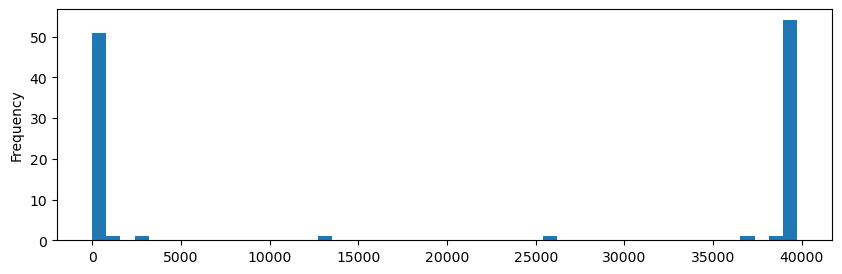

In [8]:
#There are few columns for which there are missing values and unique values and to decide on it further whether to drop or retain lets do some cleanup  let see explore more to keep or drop them
#Doing cleanup of NULLs from rows and columns of the loan dataset
c = df.isnull().sum()
c.plot(kind='hist', bins=50, figsize = (10,3))
plt.show()

In [9]:
# Above figure show that there are more null values towards 40k mark .Also there are few in between after 10k .
# Understanding on what are these before we proceed to remove

In [10]:
c.loc[(c.values > 10000) & (c.values < 39717)].sort_values()

desc                      12942
mths_since_last_delinq    25682
mths_since_last_record    36931
next_pymnt_d              38577
dtype: int64

In [11]:
# Above data suggests that months since last delinquent and months since last record of 25682 and 36931 which are unrealistic.
# Hence let us drop them as these 10k ones and of-course 40k

In [12]:
df.drop(columns=list(c[c.values > 10000].index), inplace=True)
df.shape

(39717, 53)

In [13]:
r = df.isnull().sum(axis=1) / len(df.columns)
max(r.values)

0.09433962264150944

In [14]:
# After we removed Null values, checking how many columns has unique or single values in them.
column_unique = df.nunique()
print(column_unique)

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                    

In [15]:
# Printing single vaule columns and understanding is there any significance of these columns for the analysis
c1 = column_unique[column_unique.values == 1]
c1.index

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [16]:
# Dropping single value columns and checking the shape(rows x columns) after drop for the confirmation
df.drop(columns = list(c1.index), inplace=True)
df.shape

(39717, 44)

In [17]:
# Analysing any unnecessry columns exists
# We are doing risk analysis before Loan gets approved hence having the columns that are created once the Loan is approved does not
#make any sense .So, let us check them first and drop them .
print(column_unique)

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                    

In [18]:
# From above list of columns we can see few columns are not necessary because these column represents the data after loan application is approved.
# Since we are doing risk analysis which is before loan gets approved.
# So any column which has data of already approved/rejected loans and also unique values will not have any significance for the analysis.
# Dropping the columns which gets created once loan approved
del_cols = ["id","member_id","url","zip_code","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv",
            "total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee",
           "last_pymnt_d","last_pymnt_amnt","last_credit_pull_d"]
df.drop(columns=del_cols, inplace=True)
df.shape

(39717, 28)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_title             37258 non-null  object 
 9   emp_length            38642 non-null  object 
 10  home_ownership        39717 non-null  object 
 11  annual_inc            39717 non-null  float64
 12  verification_status   39717 non-null  object 
 13  issue_d               39717 non-null  object 
 14  loan_status           39717 non-null  object 
 15  purpose            

In [20]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,pub_rec_bankruptcies
count,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39020.000000
mean,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,13382.528086,22.088828,0.043260
std,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,15885.016641,11.401709,0.204324
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000
25%,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,3703.000000,13.000000,0.000000
50%,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,8850.000000,20.000000,0.000000
75%,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17058.000000,29.000000,0.000000
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,2.000000


## Data Preparation

#### Data analysis on Loan Status

In [23]:
df['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [24]:
# Fully Paid and Charged Off will give the insightful information for our analysis.
# But loan status Current is an running emi do not give any information to determine for the loan approval or reject.
# So dropping records which has loan_status is "Current"

In [25]:
loan = df[~(df['loan_status'] == 'Current')]
loan.shape

(38577, 28)

In [26]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  object 
 4   int_rate              38577 non-null  object 
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_title             36191 non-null  object 
 9   emp_length            37544 non-null  object 
 10  home_ownership        38577 non-null  object 
 11  annual_inc            38577 non-null  float64
 12  verification_status   38577 non-null  object 
 13  issue_d               38577 non-null  object 
 14  loan_status           38577 non-null  object 
 15  purpose               38

In [27]:
loan.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,pub_rec_bankruptcies
count,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,37880.000000
mean,11047.025430,10784.058506,10222.481123,322.466318,6.877797e+04,13.272727,0.146668,0.871737,9.275423,0.055422,13289.489826,22.052648,0.043479
std,7348.441646,7090.306027,7022.720644,208.639215,6.421868e+04,6.673044,0.492271,1.071546,4.401588,0.237804,15866.492241,11.425861,0.204583
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000
25%,5300.000000,5200.000000,5000.000000,165.740000,4.000000e+04,8.130000,0.000000,0.000000,6.000000,0.000000,3650.000000,13.000000,0.000000
50%,9600.000000,9550.000000,8733.440000,277.860000,5.886800e+04,13.370000,0.000000,1.000000,9.000000,0.000000,8762.000000,20.000000,0.000000
75%,15000.000000,15000.000000,14000.000000,425.550000,8.200000e+04,18.560000,0.000000,1.000000,12.000000,0.000000,16912.000000,29.000000,0.000000
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,2.000000


In [28]:
loan['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Name: count, dtype: int64

#### Data analysis on Term

In [30]:
#Let us analise the interest rate and years/duration .
loan['term'].value_counts()

term
36 months    29096
60 months     9481
Name: count, dtype: int64

#### Data analysis on Interest Rate

In [32]:
loan['int_rate'].value_counts()

int_rate
10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.96%      1
18.36%      1
16.15%      1
16.01%      1
16.20%      1
Name: count, Length: 370, dtype: int64

In [33]:
# For analysis of Interest Rate, it should be a numeric.

In [34]:
# Removing % and converting to Numeric
loan['int_rate'] = loan['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))
loan['int_rate'].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

<Axes: >

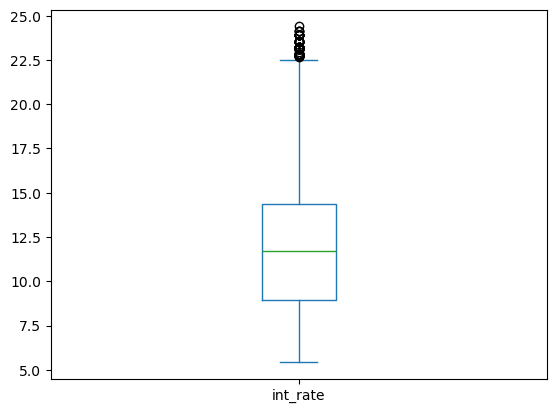

In [35]:
# Drawing plot graph to understand any outliers.
loan['int_rate'].plot.box()

In [36]:
# NOTE: From above graph, there are some outliers. we need to cleanup this before analysis.

#### Data analysis on Grade

In [38]:
loan['grade'].value_counts()

grade
B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: count, dtype: int64

#### Data analysis on Sub grade

In [40]:
loan['sub_grade'].value_counts()

sub_grade
A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
C1    2055
B2    2001
C2    1931
A3    1810
B1    1797
A2    1508
C3    1488
D2    1286
C4    1206
C5    1154
A1    1139
D3    1116
D1     931
D4     918
D5     834
E1     722
E2     614
E3     516
E4     424
E5     387
F1     305
F2     233
F3     174
F4     151
F5     113
G1      94
G2      77
G4      54
G3      45
G5      29
Name: count, dtype: int64

#### Data analysis on Employee Title

In [42]:
print(loan['emp_title'].value_counts().head())
print(loan['emp_title'].unique().shape)

emp_title
US Army              131
Bank of America      107
IBM                   65
AT&T                  57
Kaiser Permanente     56
Name: count, dtype: int64
(28028,)


#### Data analysis on Employee Length (From how many years he/she is an employee)

In [44]:
loan['emp_length'].value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

#### Data analysis on Home Ownership

In [46]:
#Let's see how many has home_ownership
loan['home_ownership'].value_counts()

home_ownership
RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: count, dtype: int64

#### Data analysis on Verification status

In [48]:
loan['verification_status'].value_counts()

verification_status
Not Verified       16694
Verified           12206
Source Verified     9677
Name: count, dtype: int64

In [49]:
#### Data analysis on Issue_d

In [50]:
# Extract the month in which loan funded.
loan['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [51]:
import datetime as dt
loan['issue_month'] = loan['issue_d'].apply(lambda x : dt.datetime.strptime(x, '%b-%y').month)

In [52]:
loan['issue_month'].value_counts()

issue_month
12    4215
11    4006
10    3761
9     3498
8     3388
7     3351
6     3180
5     2919
4     2831
3     2691
1     2379
2     2358
Name: count, dtype: int64

In [53]:
# Extract the year in which loan funded.
loan['issue_year'] = loan['issue_d'].apply(lambda x : dt.datetime.strptime(x, '%b-%y').year)

In [54]:
loan['issue_year'].value_counts()

issue_year
2011    20516
2010    11532
2009     4716
2008     1562
2007      251
Name: count, dtype: int64

#### Analysis on purpose, Checking the Purpose of borrows

In [56]:
loan['purpose'].value_counts()

purpose
debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: count, dtype: int64

In [57]:
loan['title'].value_counts()

title
Debt Consolidation           2090
Debt Consolidation Loan      1620
Personal Loan                 641
Consolidation                 491
debt consolidation            478
                             ... 
Murray Loan                     1
Need debt consolidation!        1
freedom2                        1
DAVE WEDDING                    1
JAL Loan                        1
Name: count, Length: 19297, dtype: int64

#### Purpose and Title most resembles the same and context is also on Purpose so no need of Title column

In [59]:
loan.drop(columns=['title'], inplace=True)

In [60]:
## Confirming title column is dropped.
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'pub_rec_bankruptcies',
       'issue_month', 'issue_year'],
      dtype='object')

#### checking early credit line data format for further analysis.

In [62]:
loan['earliest_cr_line'].value_counts()

earliest_cr_line
Oct-99    360
Nov-98    357
Oct-00    341
Dec-98    340
Dec-97    318
         ... 
Nov-65      1
Feb-73      1
Oct-08      1
Dec-61      1
Oct-74      1
Name: count, Length: 524, dtype: int64

In [63]:
# There are few values like Nov-20 and few values like 20-Dec, so normalising to single pattern Dec-20
# Year is mentioned in 2 digits. 98 means it should be 1998 not 2098. so any thing more than todays year we need to substract by 100 post 2000 addition.
# Number of days count of early credit lines.

In [64]:
def calculateNumberOfDays (d):
    m, y = d.split('-')
    if y in ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']:
        y, m = d.split('-')
    y = 2000 + int(y)
    if y > today.year:
        y -= 100
    earliest_cr_line = datetime.strptime(str(y)+'-'+m+'-1', '%Y-%b-%d')
    return (today - earliest_cr_line).days

In [65]:
calculateNumberOfDays("Nov-20")

1388

In [66]:
# Adding to new column.
loan['no_of_days_from_earliest_cr_line'] = loan['earliest_cr_line'].apply(calculateNumberOfDays)

In [67]:
# Verifiying number of days
loan['no_of_days_from_earliest_cr_line'].describe()

count    38577.000000
mean     10058.981647
std       2491.854695
min       5771.000000
25%       8389.000000
50%       9608.000000
75%      11220.000000
max      28721.000000
Name: no_of_days_from_earliest_cr_line, dtype: float64

In [68]:
# Since we calculated number of days and added new column so we do not need earliest_cr_line hence dropping column earliest_cr_line

loan.drop(columns=['earliest_cr_line'], inplace=True)

In [69]:
loan['revol_util'].head()

0    83.70%
1     9.40%
2    98.50%
3       21%
5    28.30%
Name: revol_util, dtype: object

In [70]:
# Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
# revol_util if all available revolving credit already used, potential reason to reject loan

loan['revol_util'] = pd.Series(loan['revol_util']).str.replace('%', '').astype(float)
loan['revol_util'].describe()

count    38527.000000
mean        48.702777
std         28.364741
min          0.000000
25%         25.200000
50%         49.100000
75%         72.300000
max         99.900000
Name: revol_util, dtype: float64

In [71]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   loan_amnt                         38577 non-null  int64  
 1   funded_amnt                       38577 non-null  int64  
 2   funded_amnt_inv                   38577 non-null  float64
 3   term                              38577 non-null  object 
 4   int_rate                          38577 non-null  float64
 5   installment                       38577 non-null  float64
 6   grade                             38577 non-null  object 
 7   sub_grade                         38577 non-null  object 
 8   emp_title                         36191 non-null  object 
 9   emp_length                        37544 non-null  object 
 10  home_ownership                    38577 non-null  object 
 11  annual_inc                        38577 non-null  float64
 12  verificat

In [72]:
# Checking the status of fully paid vs defaulters in percentage
loan_status_percent = loan['loan_status'].value_counts(normalize=True)
loan_status_percent

loan_status
Fully Paid     0.854136
Charged Off    0.145864
Name: proportion, dtype: float64

## Univariate Analysis

In [74]:
# Loan status has two types Fully Paid and Charged Off data type is string and converting to numeric for ease of analysis
loan['loan_status_num'] = loan['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)

In [75]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_month,issue_year,no_of_days_from_earliest_cr_line,loan_status_num
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,3,0,13648,83.7,9,0.0,12,2011,14476,0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,3,0,1687,9.4,4,0.0,12,2011,9273,1
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,2,0,2956,98.5,10,0.0,12,2011,8328,0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,10,0,5598,21.0,37,0.0,12,2011,10428,0
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,9,0,7963,28.3,12,0.0,12,2011,7232,0


In [76]:
# sns.set_style("whitegrid")
# sns.clustermap(data=loan.corr(), cmap='YlGnBu', figsize=(12,12))
# plt.show()

### Analysing loan amount vs loan status

In [78]:
loan['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

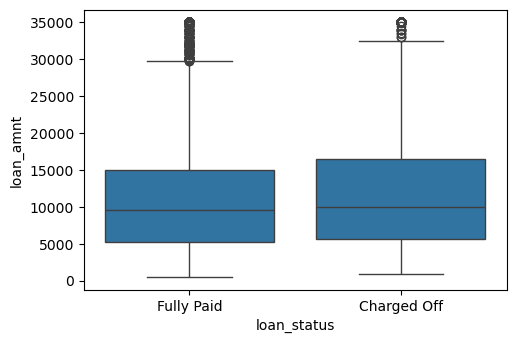

In [79]:
plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)
order = ['Fully Paid','Charged Off']
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = loan)
plt.show()

In [80]:
# since we see there is huge difference between mean and median . let us limit our data to 75% quartile

#### Analysing for less than 75% quartile

In [82]:
loan_till75 = loan.loc[(loan['loan_amnt']<=15000)]
loan_till75['loan_status'].value_counts()

loan_status
Fully Paid     25946
Charged Off     4011
Name: count, dtype: int64

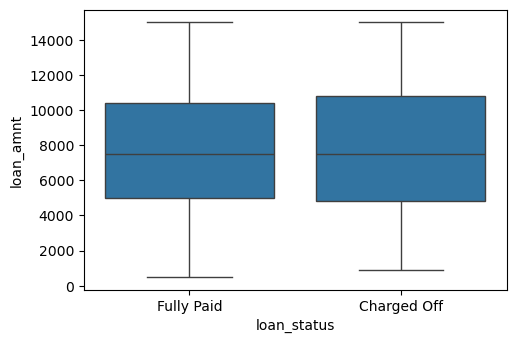

In [83]:
plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = loan_till75)
plt.show()

#### Analysing for more than 75% quartile

In [85]:
loan_above75 = loan.loc[(loan['loan_amnt']>=15000)]
loan_above75['loan_status'].value_counts()

loan_status
Fully Paid     8583
Charged Off    1875
Name: count, dtype: int64

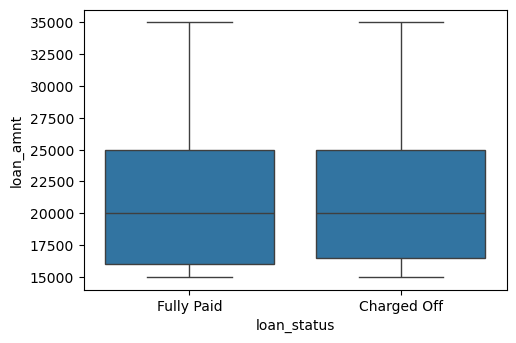

In [86]:
plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = loan_above75)
plt.show()

In [87]:
### If we compare both below 75% and above 75% quartile, percentage of defaulters more when the loan amount is more than 75% quartile.

#### Common Function:

In [89]:
# A common method to categorize column data into 3 bins [Low, Medium, High] 100% equal split into 3 bins is 33.333
def qcutpercentile (*, data=loan, column, trailer=''):
    new_column = column + '_p'
    labels = ['Low','Medium','High']
    labels = [labels[p] + '(' +
              str(round(np.nanpercentile(data[column], p * 33.33),2)) +
              trailer + ' - ' +
              str(round(np.nanpercentile(data[column], (p+1) * 33.33),2)) +
              trailer + ')'
              for p in range(3)]
    data[new_column] = pd.qcut(data[column], q=3, labels=labels)

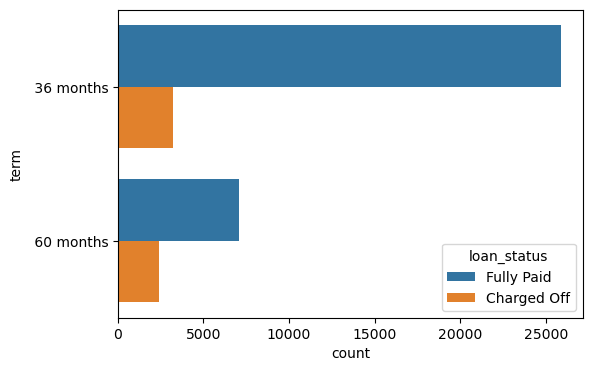

In [90]:
fig, ax = plt.subplots(figsize=(6, 4))
hue_order = list(['Fully Paid', 'Charged Off'])
sns.countplot(data=loan, y='term', hue='loan_status', hue_order=hue_order, order=loan['term'].value_counts().index)
plt.show()

##### Installment for 3 years is less defaulters, Installment for 5 years is higher the defaulters.

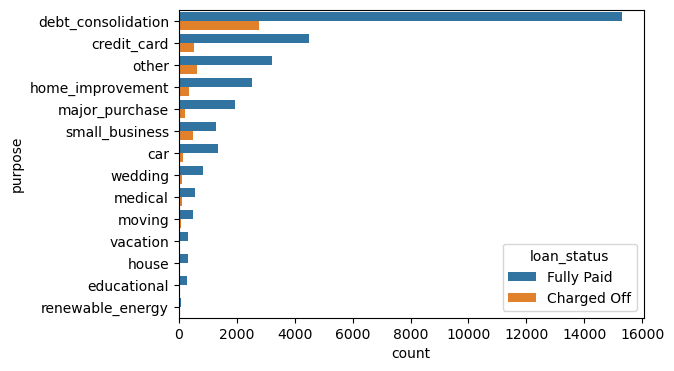

In [92]:
fig, ax = plt.subplots(figsize=(6, 4))
hue_order = list(['Fully Paid', 'Charged Off'])
sns.countplot(data=loan, y='purpose', hue='loan_status', hue_order=hue_order, order=loan['purpose'].value_counts().index)
plt.show()

##### Approving loans for small business purpose is reskier.

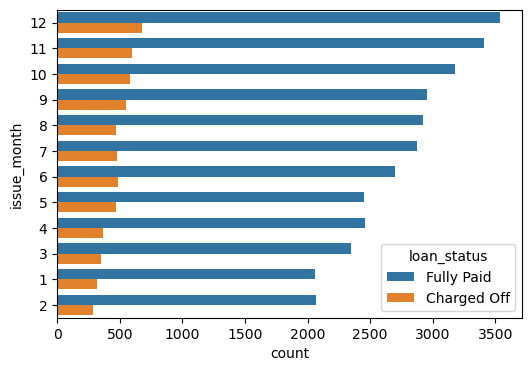

In [94]:
fig, ax = plt.subplots(figsize=(6, 4))
hue_order = list(['Fully Paid', 'Charged Off'])
sns.countplot(data=loan, y='issue_month', hue='loan_status', hue_order=hue_order, order=loan['issue_month'].value_counts().index)
plt.show()

##### December month shows higher defaulters, also applicants are more during december month.

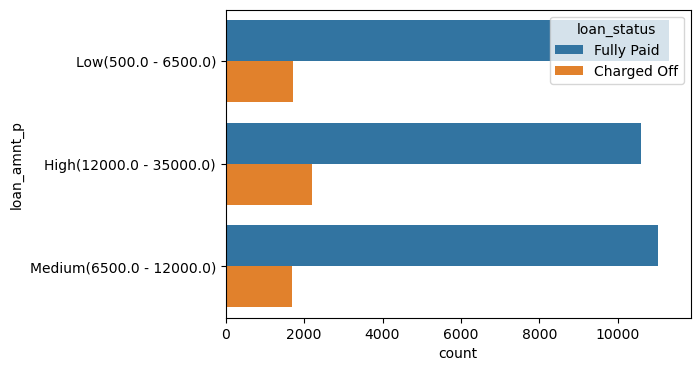

In [96]:
qcutpercentile(column='loan_amnt')

fig, ax = plt.subplots(figsize=(6, 4))
hue_order = list(['Fully Paid', 'Charged Off'])
sns.countplot(data=loan, y='loan_amnt_p', hue='loan_status', hue_order=hue_order, order=loan['loan_amnt_p'].value_counts().index)
plt.show()

##### From graph it represents, Greater the chance of getting default if amount is higher.

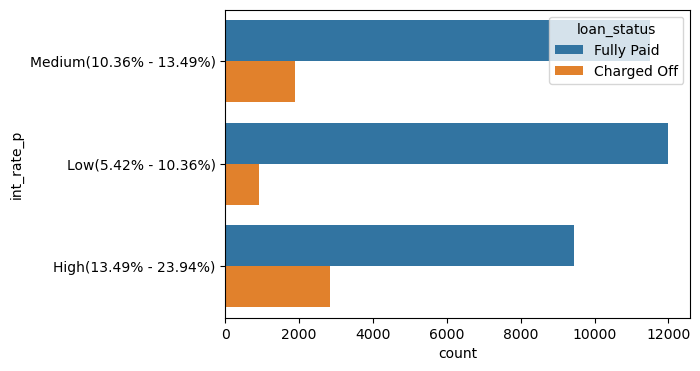

In [98]:
qcutpercentile(column='int_rate', trailer='%')

fig, ax = plt.subplots(figsize=(6, 4))
hue_order = list(['Fully Paid', 'Charged Off'])
sns.countplot(data=loan, y='int_rate_p', hue='loan_status', hue_order=hue_order, order=loan['int_rate_p'].value_counts().index)
plt.show()

##### From graph it represents, Greater the chance of getting default if interest is higher.

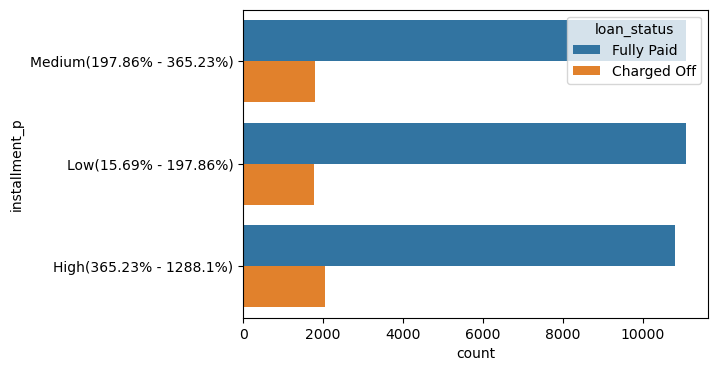

In [100]:
qcutpercentile(column='installment', trailer='%')

fig, ax = plt.subplots(figsize=(6, 4))
hue_order = list(['Fully Paid', 'Charged Off'])
sns.countplot(data=loan, y='installment_p', hue='loan_status', hue_order=hue_order, order=loan['installment_p'].value_counts().index)
plt.show()

##### From graph it represents, Greater the chance of getting default if number of installments is higher.

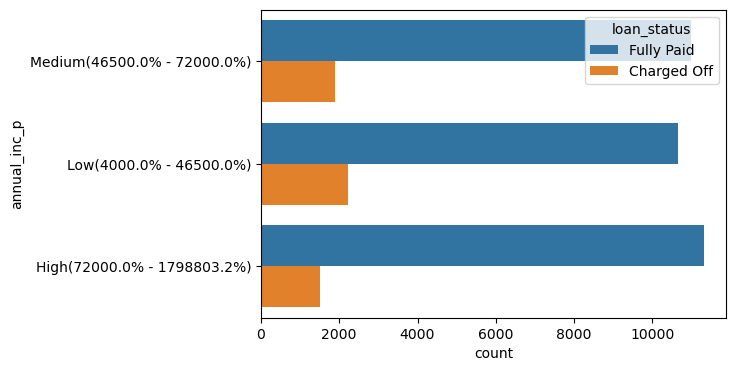

In [102]:
qcutpercentile(column='annual_inc', trailer='%')

fig, ax = plt.subplots(figsize=(6, 4))
hue_order = list(['Fully Paid', 'Charged Off'])
sns.countplot(data=loan, y='annual_inc_p', hue='loan_status', hue_order=hue_order, order=loan['annual_inc_p'].value_counts().index)
plt.show()

##### From graph it represents, Higher the income, higher the repayment percentage and lower the income higher the defaulters

## Bivariate Analysis

##### Till now we have observed how loan status is influnced by different individual variables.

##### Now, analysing how combined variables are impacting to loan status

In [107]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'pub_rec_bankruptcies', 'issue_month', 'issue_year',
       'no_of_days_from_earliest_cr_line', 'loan_status_num', 'loan_amnt_p',
       'int_rate_p', 'installment_p', 'annual_inc_p'],
      dtype='object')

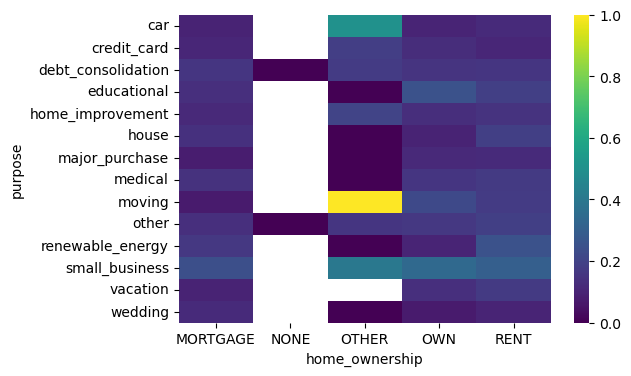

In [108]:
fig, ax = plt.subplots(figsize=(6,4))
pt = pd.pivot_table(data=loan, values='loan_status_num', index='purpose', columns='home_ownership')
sns.heatmap(pt, ax=ax, cmap='viridis')
plt.show()

##### The intersection of home ownership (OTHER) and purpose (Moving) has the darker color represents riskier
- OTHER with small business, moving, car purpose is risker

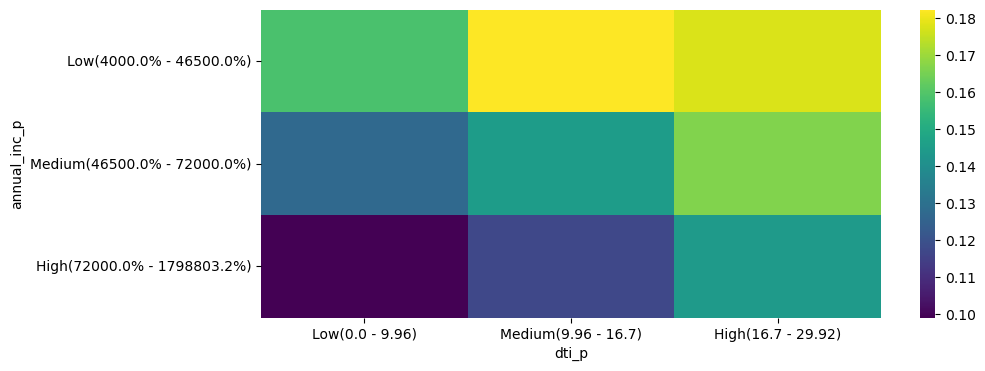

In [110]:
qcutpercentile(column='dti')
fig, ax = plt.subplots(figsize=(10,4))
pt = pd.pivot_table(data=loan, values='loan_status_num', index='annual_inc_p', columns='dti_p')
sns.heatmap(pt, ax=ax, cmap='viridis')
plt.show()

##### From above, observation: Medium to High debt to income vs lower the annual income risk is higher.

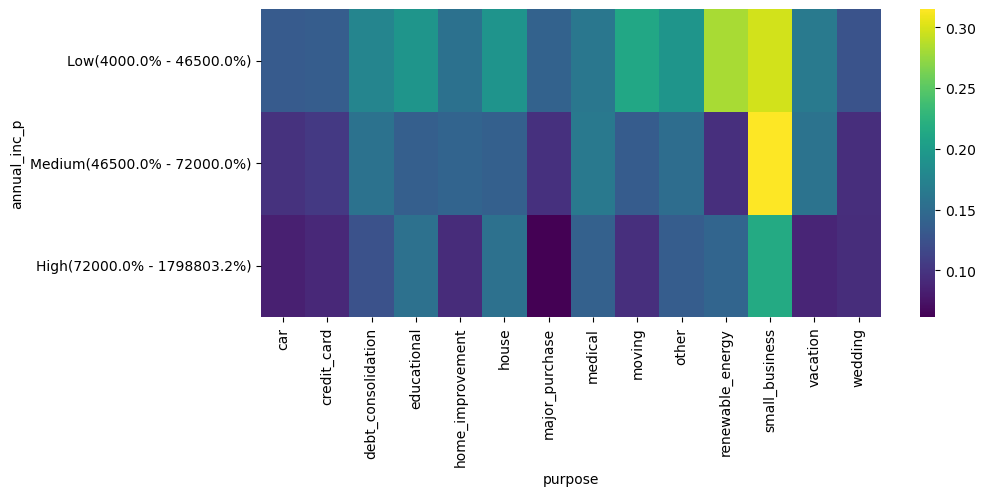

In [112]:
fig, ax = plt.subplots(figsize=(10,4))
pt = pd.pivot_table(data=loan, values='loan_status_num', index='annual_inc_p', columns='purpose')
sns.heatmap(pt, ax=ax, cmap='viridis')
plt.show()

##### Applicant with medium income applying loan for small business purpose is very risky.
##### Applicant with high income applying loan for car, credit_card, major_purchase, home_improvement, vacation, wedding purpose less risky.